In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [3]:
golf_scores = pd.read_csv('jake_golf_scores.csv')

In [4]:
golf_scores.head()

,DateOfRound,Score,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage
0,6/25/2020,76,36,21,18,85.714286,7,13,43,5,0,0.000000
1,6/26/2020,72,31,19,17,89.473684,11,12,41,6,3,50.000000
2,6/29/2020,70,30,20,16,80.000000,6,11,41,7,3,42.857143
3,6/30/2020,72,33,21,17,80.952381,6,13,43,5,2,40.000000
4,7/1/2020,72,32,17,16,94.117647,6,10,42,8,3,37.500000


In [5]:
golf_scores_num = golf_scores.drop(columns = 'DateOfRound')

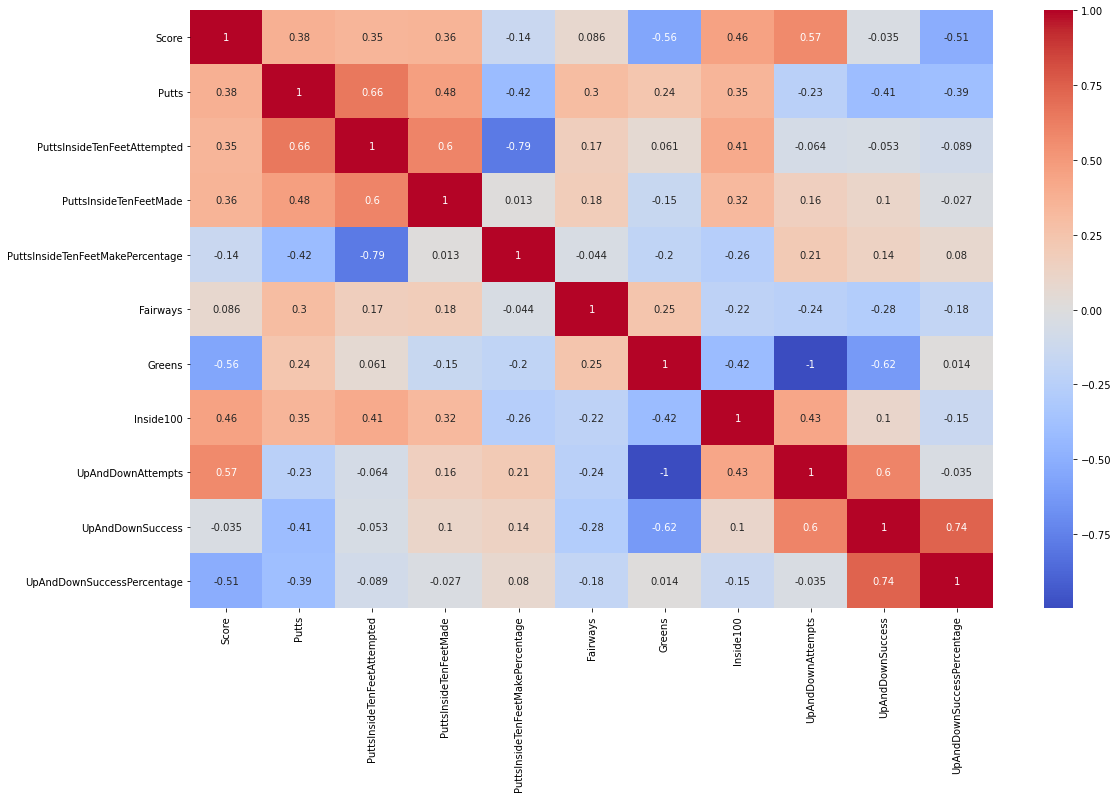

In [6]:
golf_scores_num_correlations = golf_scores_num.corr()
plt.figure(figsize = (18,11))
sns.heatmap(golf_scores_num_correlations, annot = True, cmap = "coolwarm");

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import linear_model 

In [8]:
base_features = ['Putts', 'PuttsInsideTenFeetAttempted', 'PuttsInsideTenFeetMade', 'PuttsInsideTenFeetMakePercentage', 'Fairways', 'Greens', 'Inside100', 'UpAndDownAttempts', 'UpAndDownSuccess', 'UpAndDownSuccessPercentage']
X = golf_scores_num[base_features]
X

,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage
0,36,21,18,85.714286,7,13,43,5,0,0.000000
1,31,19,17,89.473684,11,12,41,6,3,50.000000
2,30,20,16,80.000000,6,11,41,7,3,42.857143
3,33,21,17,80.952381,6,13,43,5,2,40.000000
4,32,17,16,94.117647,6,10,42,8,3,37.500000
5,31,21,16,76.190476,6,12,45,6,3,50.000000
6,31,20,17,85.000000,4,10,41,8,5,62.500000
7,30,16,15,93.750000,5,7,44,11,4,36.363636
8,34,20,18,90.000000,10,11,44,7,2,28.571429
9,33,21,17,80.952381,7,12,43,6,2,33.333333


In [9]:
y = golf_scores_num.Score 
y.head()

0    76
1    72
2    70
3    72
4    72
Name: Score, dtype: int64

In [10]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(29, 10) (8, 10) (29,) (8,)


In [11]:
print(X.shape, y.shape)

(37, 10) (37,)


In [12]:
lr = LogisticRegression(max_iter = 2000)
lr_cv = cross_val_score(lr, X, y, cv = 8)
print(100 * lr_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * lr_cv.mean()))

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation

In [13]:
# Difference between training and test set for Logistic Regression model 
from sklearn.metrics import accuracy_score
lr.fit(train_X, train_y)
lr_train_acc = accuracy_score(y_true=train_y, y_pred=lr.predict(train_X))
lr_test_acc = accuracy_score(y_true=val_y, y_pred=lr.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * lr_train_acc))
print('Test Accuracy: %.2f%%' % (100 * lr_test_acc))
print()

Training Accuracy: 89.66%
Test Accuracy: 12.50%

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_cv = cross_val_score(dt, X, y, cv = 8)
print(100 * dt_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * dt_cv.mean()))

[ 0. 40.  0.  0.  0. 25. 25. 25.]

CV Mean: 14.37%
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"


In [15]:
dt.fit(train_X, train_y)
dt_train_acc = accuracy_score(y_true=train_y, y_pred=dt.predict(train_X))
dt_test_acc = accuracy_score(y_true=val_y, y_pred=dt.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * dt_train_acc))
print('Test Accuracy: %.2f%%' % (100 * dt_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 37.50%



In [16]:
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn, X, y, cv = 8)
print(100 * knn_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * knn_cv.mean()))

[60.  0.  0. 20. 20. 50.  0. 50.]

CV Mean: 25.00%
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"


In [17]:
knn.fit(train_X, train_y)
knn_train_acc = accuracy_score(y_true=train_y, y_pred=knn.predict(train_X))
knn_test_acc = accuracy_score(y_true=val_y, y_pred=knn.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * knn_train_acc))
print('Test Accuracy: %.2f%%' % (100 * knn_test_acc))
print()

Training Accuracy: 41.38%
Test Accuracy: 12.50%



In [18]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf_cv = cross_val_score(rf, X, y, cv = 8)
print(100 * rf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * rf_cv.mean()))

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
[20. 20.  0. 40. 20. 25. 50. 25.]

CV Mean: 25.00%


In [19]:
rf.fit(train_X, train_y)
rf_train_acc = accuracy_score(y_true=train_y, y_pred=rf.predict(train_X))
rf_test_acc = accuracy_score(y_true=val_y, y_pred=rf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * rf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * rf_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 37.50%



In [20]:
svc = SVC(probability = True)
svc_cv = cross_val_score(svc, X, y, cv = 8)
print(100 * svc_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * svc_cv.mean()))

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
[20. 20. 20. 20. 20. 25. 25. 25.]

CV Mean: 21.88%


In [21]:
svc.fit(train_X, train_y)
svc_train_acc = accuracy_score(y_true=train_y, y_pred=svc.predict(train_X))
svc_test_acc = accuracy_score(y_true=val_y, y_pred=svc.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * svc_train_acc))
print('Test Accuracy: %.2f%%' % (100 * svc_test_acc))
print()

Training Accuracy: 24.14%
Test Accuracy: 12.50%



In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_cv = cross_val_score(xgb, X, y, cv = 8)
print(100 * xgb_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * xgb_cv.mean()))

[21:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when c

In [23]:
xgb.fit(train_X, train_y)
xgb_train_acc = accuracy_score(y_true=train_y, y_pred=xgb.predict(train_X))
xgb_test_acc = accuracy_score(y_true=val_y, y_pred=xgb.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * xgb_train_acc))
print('Test Accuracy: %.2f%%' % (100 * xgb_test_acc))
print()

[21:53:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
Training Accuracy: 100.00%
Test Accuracy: 25.00%



In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cv = cross_val_score(reg, X, y, cv = 8, scoring = 'neg_mean_squared_error')
print(-1 * cv)
print()
print('CV Mean:' + str((-1 * cv.mean())))

[ 4.54556263  3.44895682  7.38162946  2.56369112  3.51418557  7.11501693
 12.49790221  6.54098772]

CV Mean:5.95099155686836


In [25]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier (estimators = [('lr', lr), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'soft')
voting_clf_cv = cross_val_score(voting_clf, X, y, cv = 8)
print(100 * voting_clf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * voting_clf_cv.mean()))

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation

In [26]:
voting_clf.fit(train_X, train_y)
voting_clf_train_acc = accuracy_score(y_true=train_y, y_pred=voting_clf.predict(train_X))
voting_clf_test_acc = accuracy_score(y_true=val_y, y_pred=voting_clf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * voting_clf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * voting_clf_test_acc))
print()

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; an

In [27]:
# Compare all results in data frame
results_on_val_X = [lr_test_acc, dt_test_acc, rf_test_acc, knn_test_acc, xgb_test_acc, svc_test_acc, voting_clf_test_acc]
results_on_val_X = pd.DataFrame(results_on_val_X)
results_on_val_X = results_on_val_X.rename(columns = {0: 'Test Accuracy on Score'})
results_on_val_X['Test Accuracy on Score'] = 100 * results_on_val_X['Test Accuracy on Score']
results_on_val_X = results_on_val_X.rename(index = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN', 4: 'XGB Classifier', 5: 'SVC', 6: 'Voting Classifier'})
results_on_val_X['CV Accuracy on Score'] = [lr_cv.mean(), dt_cv.mean(), rf_cv.mean(), knn_cv.mean(), xgb_cv.mean(), svc_cv.mean(), voting_clf_cv.mean()]
results_on_val_X['CV Accuracy on Score'] = 100 * results_on_val_X['CV Accuracy on Score']
results_on_val_X

,Test Accuracy on Score,CV Accuracy on Score
Logistic Regression,12.5,16.250
Decision Tree,37.5,14.375
Random Forest,37.5,25.000
KNN,12.5,25.000
XGB Classifier,25.0,22.500
SVC,12.5,21.875
Voting Classifier,37.5,19.375


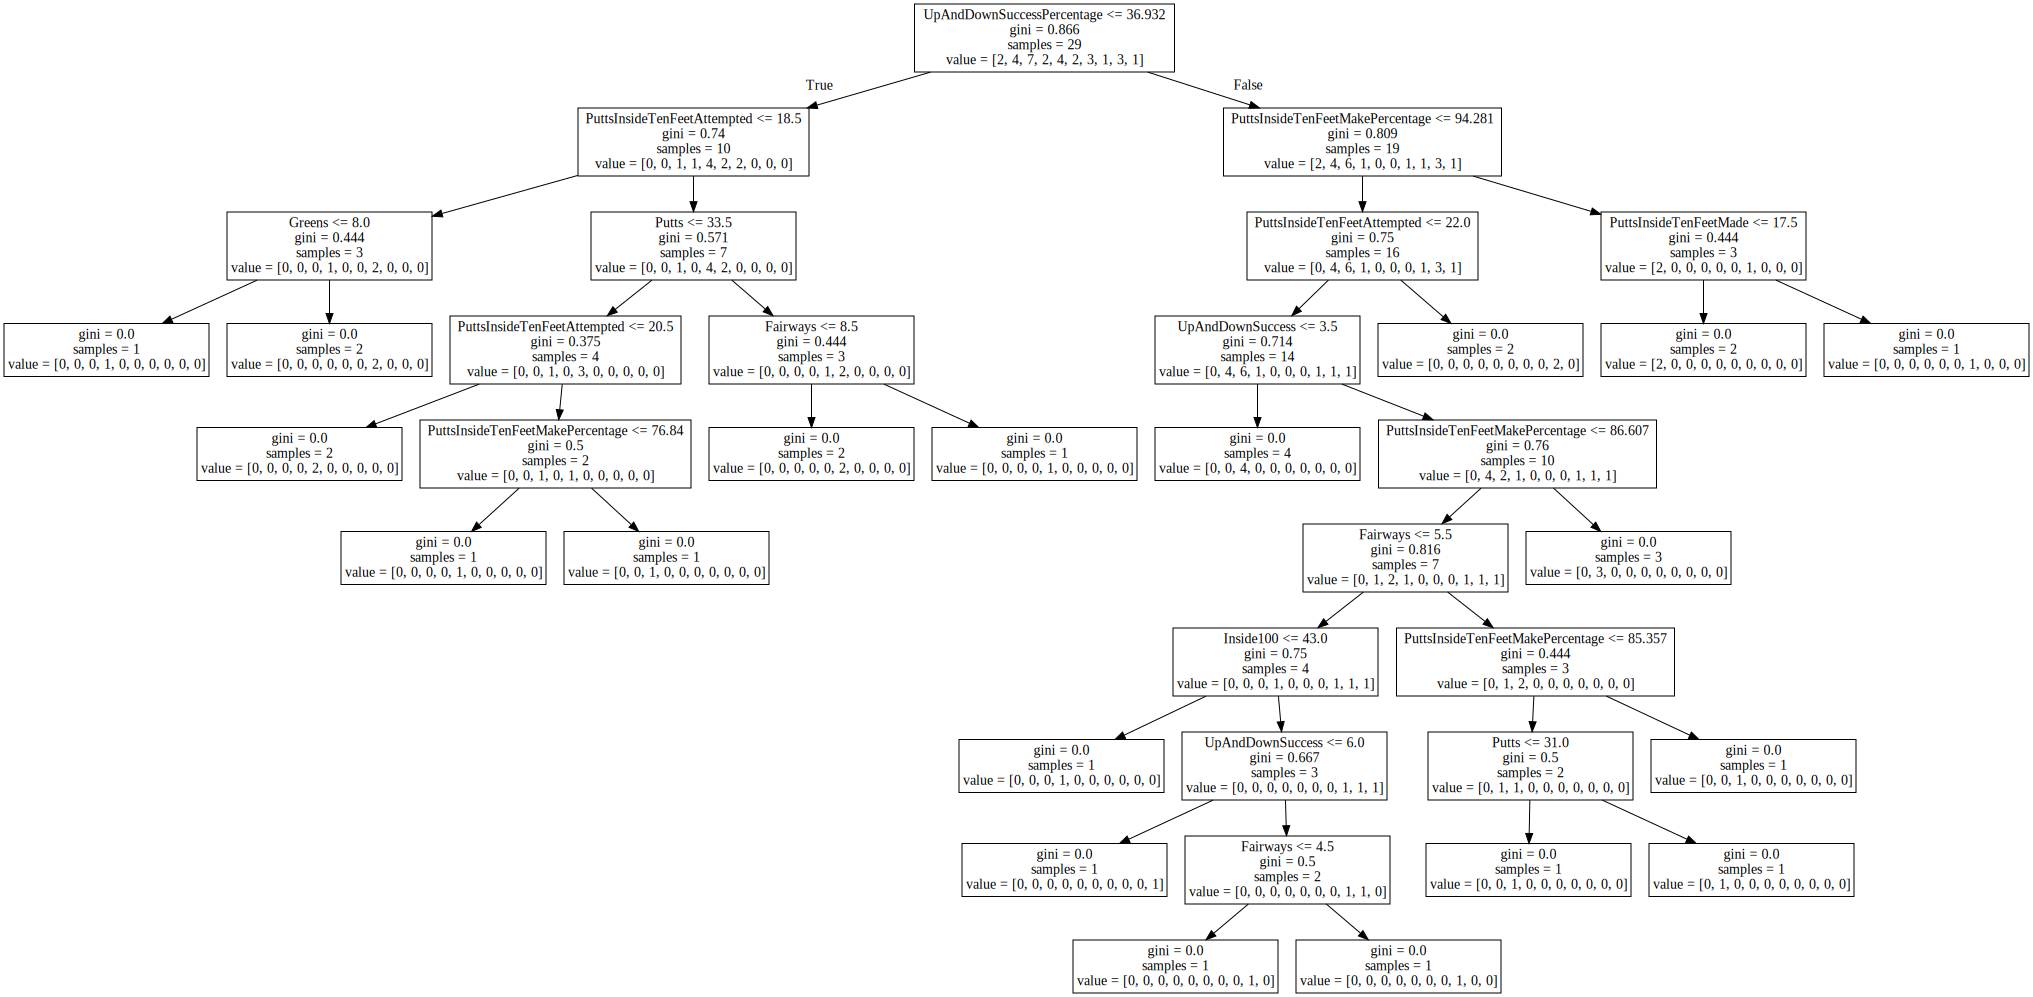

In [28]:
import graphviz

tree_graph = tree.export_graphviz(dt, out_file=None, feature_names= base_features)
graphviz.Source(tree_graph)

In [29]:
import eli5
from eli5.sklearn import PermutationImportance
lr.fit(train_X, train_y)
perm = PermutationImportance(lr, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Weight,Feature
0.0500 ± 0.1225,Greens
0 ± 0.0000,UpAndDownSuccess
0 ± 0.0000,UpAndDownAttempts
0 ± 0.0000,Inside100
0 ± 0.0000,Fairways
0 ± 0.0000,PuttsInsideTenFeetMade
0 ± 0.0000,Putts
-0.0250 ± 0.1000,PuttsInsideTenFeetAttempted
-0.0500 ± 0.1225,UpAndDownSuccessPercentage
-0.0500 ± 0.1225,PuttsInsideTenFeetMakePercentage


In [30]:
rf.fit(train_X, train_y)
perm2 = PermutationImportance(rf, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm2, feature_names = val_X.columns.tolist())

Weight,Feature
0.1000 ± 0.2449,UpAndDownSuccessPercentage
0.0750 ± 0.1225,UpAndDownSuccess
0.0750 ± 0.1225,PuttsInsideTenFeetMakePercentage
0.0750 ± 0.1225,PuttsInsideTenFeetMade
0.0750 ± 0.1225,PuttsInsideTenFeetAttempted
0.0250 ± 0.1000,Inside100
0 ± 0.0000,UpAndDownAttempts
0 ± 0.0000,Greens
0 ± 0.0000,Fairways
0 ± 0.0000,Putts


In [31]:
knn.fit(train_X, train_y)
perm3 = PermutationImportance(knn, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm3, feature_names = val_X.columns.tolist())

Weight,Feature
0.0750 ± 0.1225,UpAndDownSuccessPercentage
0.0500 ± 0.1225,PuttsInsideTenFeetMakePercentage
0.0250 ± 0.1000,Inside100
0 ± 0.0000,UpAndDownSuccess
0 ± 0.0000,UpAndDownAttempts
0 ± 0.0000,Greens
0 ± 0.0000,Fairways
0 ± 0.0000,PuttsInsideTenFeetMade
0 ± 0.0000,PuttsInsideTenFeetAttempted
0 ± 0.0000,Putts


In [32]:
# Fit all data
knn.fit(train_X, train_y)
reg.fit(train_X, train_y)
lr.fit(train_X, train_y)
rf.fit(train_X, train_y)
# Predict what y will be and add to data frame 
PredictedScore_Knn = knn.predict(val_X)
PredictedScore_Knn = pd.DataFrame(PredictedScore_Knn)
PredictedScore_Knn = PredictedScore_Knn.rename(columns = {0 : 'Knn PredictedScore'})
PredictedScore_reg = reg.predict(val_X)
PredictedScore_reg = pd.DataFrame(PredictedScore_reg)
PredictedScore_reg = PredictedScore_reg.rename(columns = {0 : 'Linear Regression PredictedScore'})
PredictedScore_lr = lr.predict(val_X)
PredictedScore_lr = pd.DataFrame(PredictedScore_lr)
PredictedScore_lr = PredictedScore_lr.rename(columns = {0 : 'Logistic Regression PredictedScore'})
PredictedScore_rf = rf.predict(val_X)
PredictedScore_rf = pd.DataFrame(PredictedScore_rf)
PredictedScore_rf = PredictedScore_rf.rename(columns = {0 : 'Random Forest PredictedScore'})
# Concat all predicted scores to data frame 
PredictedScore = [PredictedScore_Knn, PredictedScore_lr, PredictedScore_reg, PredictedScore_rf]
PredictedScore = pd.concat(PredictedScore, axis = 1)
# Concat predicted scores with data used to predict it 
Predict_X = pd.DataFrame(val_X)
Predict_X = Predict_X.reset_index(drop = True)
Predicition = [Predict_X, PredictedScore]
PredictedScoreWithStats = pd.concat(Predicition, axis = 1)
# Concat predicted scores with actual scorres to compare
Actual_Score = pd.DataFrame(val_y)
Actual_Score = Actual_Score.reset_index(drop = True)
Actual_Score = Actual_Score.rename(columns = {0: 'Actual Score'})
Prediction_With_Actual = [PredictedScoreWithStats, Actual_Score]
Prediction_With_Actual = pd.concat(Prediction_With_Actual, axis = 1)
# Move to csv file 
#Prediction_With_Actual.to_csv('Prediction_With_Actual_All_Models.csv')


C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1. feature 9 (0.144530)
2. feature 0 (0.117418)
3. feature 1 (0.112701)
4. feature 6 (0.109771)
5. feature 8 (0.099364)
6. feature 4 (0.091688)
7. feature 3 (0.090218)
8. feature 5 (0.082424)
9. feature 7 (0.080579)
10. feature 2 (0.071307)


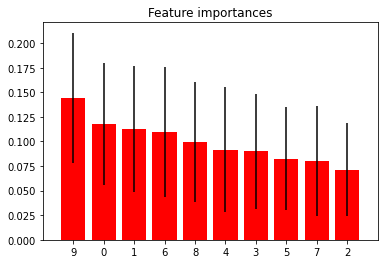

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(train_X, train_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [34]:
base_features = pd.DataFrame(base_features)
base_features

,0
0,Putts
1,PuttsInsideTenFeetAttempted
2,PuttsInsideTenFeetMade
3,PuttsInsideTenFeetMakePercentage
4,Fairways
5,Greens
6,Inside100
7,UpAndDownAttempts
8,UpAndDownSuccess
9,UpAndDownSuccessPercentage


In [35]:
# Defining percentage functions 
def putts_inside_of_ten(PuttsInsideTenFeetAttempted, PuttsInsideTenFeetMade):
    ten_feet_percentage = (100 * (PuttsInsideTenFeetMade / PuttsInsideTenFeetAttempted))
    return ten_feet_percentage

def up_and_down(UpAndDownAttempts, UpAndDownSuccess):
    up_and_down_percentage = (100 * (UpAndDownSuccess / UpAndDownAttempts))
    return up_and_down_percentage

In [36]:
# Input of round
def round(Putts, PuttsInsideTenFeetAttempted, PuttsInsideTenFeetMade, Fairways, Greens, Inside100, UpAndDownAttempts, UpAndDownSuccess):
    PuttsInsideTenFeetMakePercentage = putts_inside_of_ten(PuttsInsideTenFeetAttempted, PuttsInsideTenFeetMade)
    UpAndDownSuccessPercentage = up_and_down(UpAndDownAttempts, UpAndDownSuccess)
    return np.array([Putts, PuttsInsideTenFeetAttempted, PuttsInsideTenFeetMade, PuttsInsideTenFeetMakePercentage, Fairways, Greens, Inside100, UpAndDownAttempts, UpAndDownSuccess, UpAndDownSuccessPercentage]).reshape(1,-1)


In [37]:
golf_round = round(31, 19, 18, 4, 12, 41, 6, 3)
golf_round
prediction = rf.predict(golf_round)
prediction = pd.DataFrame(prediction)
prediction = prediction.rename(columns = {0: 'Predicted Score'})
prediction

,Predicted Score
0,72


In [38]:
# Create new data frame for comparison to average
golf_scores_with_average = golf_scores.copy()
golf_scores_with_average['AverageScore'] = golf_scores_with_average.Score.mean()
golf_scores_with_average['AboveOrBelowAverage'] = golf_scores_with_average.Score > golf_scores_with_average.AverageScore

In [39]:
# Above or below average column changed to when above average = 1 and below average = 0
golf_scores_with_average['AboveOrBelowAverage'] = golf_scores_with_average['AboveOrBelowAverage'].astype(int)
golf_scores_with_average_num = golf_scores_with_average.drop(columns = ['DateOfRound'])
golf_scores_with_average_num

,Score,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage,AverageScore,AboveOrBelowAverage
0,76,36,21,18,85.714286,7,13,43,5,0,0.000000,74.378378,1
1,72,31,19,17,89.473684,11,12,41,6,3,50.000000,74.378378,0
2,70,30,20,16,80.000000,6,11,41,7,3,42.857143,74.378378,0
3,72,33,21,17,80.952381,6,13,43,5,2,40.000000,74.378378,0
4,72,32,17,16,94.117647,6,10,42,8,3,37.500000,74.378378,0
5,72,31,21,16,76.190476,6,12,45,6,3,50.000000,74.378378,0
6,73,31,20,17,85.000000,4,10,41,8,5,62.500000,74.378378,0
7,73,30,16,15,93.750000,5,7,44,11,4,36.363636,74.378378,0
8,75,34,20,18,90.000000,10,11,44,7,2,28.571429,74.378378,1
9,72,33,21,17,80.952381,7,12,43,6,2,33.333333,74.378378,0


In [40]:
base_features2 = ['Putts', 'PuttsInsideTenFeetAttempted', 'PuttsInsideTenFeetMade', 'PuttsInsideTenFeetMakePercentage', 'Fairways', 'Greens', 'Inside100', 'UpAndDownAttempts', 'UpAndDownSuccess', 'UpAndDownSuccessPercentage']
X = golf_scores_with_average_num[base_features2]
X

,Putts,PuttsInsideTenFeetAttempted,PuttsInsideTenFeetMade,PuttsInsideTenFeetMakePercentage,Fairways,Greens,Inside100,UpAndDownAttempts,UpAndDownSuccess,UpAndDownSuccessPercentage
0,36,21,18,85.714286,7,13,43,5,0,0.000000
1,31,19,17,89.473684,11,12,41,6,3,50.000000
2,30,20,16,80.000000,6,11,41,7,3,42.857143
3,33,21,17,80.952381,6,13,43,5,2,40.000000
4,32,17,16,94.117647,6,10,42,8,3,37.500000
5,31,21,16,76.190476,6,12,45,6,3,50.000000
6,31,20,17,85.000000,4,10,41,8,5,62.500000
7,30,16,15,93.750000,5,7,44,11,4,36.363636
8,34,20,18,90.000000,10,11,44,7,2,28.571429
9,33,21,17,80.952381,7,12,43,6,2,33.333333


In [41]:
y = golf_scores_with_average_num.AboveOrBelowAverage
y.head()

0    1
1    0
2    0
3    0
4    0
Name: AboveOrBelowAverage, dtype: int32

In [42]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(29, 10) (8, 10) (29,) (8,)


In [43]:
print(X.shape, y.shape)

(37, 10) (37,)


In [44]:
lr = LogisticRegression(max_iter = 2000)
lr_cv = cross_val_score(lr, X, y, cv = 8)
print(100 * lr_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * lr_cv.mean()))

[100.  60.  60.  40. 100. 100.  75. 100.]

CV Mean: 79.38%


In [45]:
lr.fit(train_X, train_y)
lr_train_acc = accuracy_score(y_true=train_y, y_pred=lr.predict(train_X))
lr_test_acc = accuracy_score(y_true=val_y, y_pred=lr.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * lr_train_acc))
print('Test Accuracy: %.2f%%' % (100 * lr_test_acc))
print()

Training Accuracy: 86.21%
Test Accuracy: 87.50%



In [46]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_cv = cross_val_score(dt, X, y, cv = 8)
print(100 * dt_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * dt_cv.mean()))

[ 40.  20.  60.  60.  60.  50.  50. 100.]

CV Mean: 55.00%


In [47]:
dt.fit(train_X, train_y)
dt_train_acc = accuracy_score(y_true=train_y, y_pred=dt.predict(train_X))
dt_test_acc = accuracy_score(y_true=val_y, y_pred=dt.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * dt_train_acc))
print('Test Accuracy: %.2f%%' % (100 * dt_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 62.50%



In [48]:
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn, X, y, cv = 8)
print(100 * knn_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * knn_cv.mean()))

[100.   0.  80.  80.  80. 100.  50. 100.]

CV Mean: 73.75%


In [49]:
knn.fit(train_X, train_y)
knn_train_acc = accuracy_score(y_true=train_y, y_pred=knn.predict(train_X))
knn_test_acc = accuracy_score(y_true=val_y, y_pred=knn.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * knn_train_acc))
print('Test Accuracy: %.2f%%' % (100 * knn_test_acc))
print()

Training Accuracy: 79.31%
Test Accuracy: 62.50%



In [50]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf_cv = cross_val_score(rf, X, y, cv = 8)
print(100 * rf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * rf_cv.mean()))

[ 80.  20.  80.  40. 100.  25.  25. 100.]

CV Mean: 58.75%


In [51]:
rf.fit(train_X, train_y)
rf_train_acc = accuracy_score(y_true=train_y, y_pred=rf.predict(train_X))
rf_test_acc = accuracy_score(y_true=val_y, y_pred=rf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * rf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * rf_test_acc))
print()

Training Accuracy: 100.00%
Test Accuracy: 75.00%



In [52]:
svc = SVC(probability = True)
svc_cv = cross_val_score(svc, X, y, cv = 8)
print(100 * svc_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * svc_cv.mean()))

[ 80.   0.  80.  80.  80.  75.  75. 100.]

CV Mean: 71.25%


In [53]:
svc.fit(train_X, train_y)
svc_train_acc = accuracy_score(y_true=train_y, y_pred=svc.predict(train_X))
svc_test_acc = accuracy_score(y_true=val_y, y_pred=svc.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * svc_train_acc))
print('Test Accuracy: %.2f%%' % (100 * svc_test_acc))
print()

Training Accuracy: 75.86%
Test Accuracy: 62.50%



In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_cv = cross_val_score(xgb, X, y, cv = 8)
print(100 * xgb_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * xgb_cv.mean()))

[21:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [55]:
xgb.fit(train_X, train_y)
xgb_train_acc = accuracy_score(y_true=train_y, y_pred=xgb.predict(train_X))
xgb_test_acc = accuracy_score(y_true=val_y, y_pred=xgb.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * xgb_train_acc))
print('Test Accuracy: %.2f%%' % (100 * xgb_test_acc))
print()

[21:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.00%
Test Accuracy: 62.50%

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [56]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier (estimators = [('lr', lr), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'hard')
voting_clf_cv = cross_val_score(voting_clf, X, y, cv = 8)
print(100 * voting_clf_cv)
print()
print('CV Mean: %.2f%%' % ( 100 * voting_clf_cv.mean()))

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[21:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\

In [57]:
voting_clf.fit(train_X, train_y)
voting_clf_train_acc = accuracy_score(y_true=train_y, y_pred=voting_clf.predict(train_X))
voting_clf_test_acc = accuracy_score(y_true=val_y, y_pred=voting_clf.predict(val_X))
print('Training Accuracy: %.2f%%' % (100 * voting_clf_train_acc))
print('Test Accuracy: %.2f%%' % (100 * voting_clf_test_acc))
print()

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[21:54:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 96.55%
Test Accuracy: 75.00%



In [58]:
# Compare all results in data frame
below_or_above_average_on_val_X = [lr_test_acc, dt_test_acc, rf_test_acc, knn_test_acc, xgb_test_acc, svc_test_acc, voting_clf_test_acc]
below_or_above_average_on_val_X = pd.DataFrame(below_or_above_average_on_val_X)
below_or_above_average_on_val_X = below_or_above_average_on_val_X.rename(columns = {0: 'Test Accuracy for Average'})
below_or_above_average_on_val_X['Test Accuracy for Average'] = 100 * below_or_above_average_on_val_X['Test Accuracy for Average']
below_or_above_average_on_val_X = below_or_above_average_on_val_X.rename(index = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN', 4: 'XGB Classifier', 5: 'SVC', 6: 'Voting Classifier'})
below_or_above_average_on_val_X['CV Accuracy for Average'] = [lr_cv.mean(), dt_cv.mean(), rf_cv.mean(), knn_cv.mean(), xgb_cv.mean(), svc_cv.mean(), voting_clf_cv.mean()]
below_or_above_average_on_val_X['CV Accuracy for Average'] = 100 * below_or_above_average_on_val_X['CV Accuracy for Average']
comparison = [results_on_val_X, below_or_above_average_on_val_X]
comparison = pd.concat(comparison, axis = 1)
comparison

,Test Accuracy on Score,CV Accuracy on Score,Test Accuracy for Average,CV Accuracy for Average
Logistic Regression,12.5,16.250,87.5,79.375
Decision Tree,37.5,14.375,62.5,55.000
Random Forest,37.5,25.000,75.0,58.750
KNN,12.5,25.000,62.5,73.750
XGB Classifier,25.0,22.500,62.5,67.500
SVC,12.5,21.875,62.5,71.250
Voting Classifier,37.5,19.375,75.0,73.125


In [60]:
import pickle
with open("model.golf", 'wb') as f_out:
    pickle.dump(lr, f_out)
    f_out.close()

In [62]:
from sklearn.pipeline import make_pipeline

pipelines = {
    'lr':make_pipeline(LogisticRegression(max_iter = 2000)), 'dt':make_pipeline(tree.DecisionTreeClassifier(random_state = 1)),
    'knn':make_pipeline(KNeighborsClassifier()),
    'rf':make_pipeline(RandomForestClassifier(n_estimators = 500, random_state = 1)),
    'svc':make_pipeline(SVC(probability = True)),
    'xgb':make_pipeline(XGBClassifier(random_state = 1)),
    'voting_clf':make_pipeline(VotingClassifier(estimators = [('lr', lr), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'hard'))
}

In [63]:
VotingClassifier(estimators = [('lr', lr), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'hard').get_params()

{'estimators': [('lr', LogisticRegression(max_iter=2000)),
  ('dt', DecisionTreeClassifier(random_state=1)),
  ('knn', KNeighborsClassifier()),
  ('rf', RandomForestClassifier(n_estimators=500, random_state=1)),
  ('svc', SVC(probability=True)),
  ('xgb',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                 importance_type='gain', interaction_constraints='',
                 learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                 min_child_weight=1, missing=nan, monotone_constraints='()',
                 n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                 tree_method='exact', validate_parameters=1, verbosity=None))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'lr': LogisticRegression(max_iter

In [64]:
hypergrid = {
    'lr':{
        'logisticregression__C': [0.001,0.01,0.1,1,10,100,1000]
    },
    'dt':{
        'decisiontreeclassifier__min_samples_split':[2,4,6],
'decisiontreeclassifier__min_samples_leaf':[1,2,3]
    },
    'knn':{
        'kneighborsclassifier__n_neighbors':range(1,10,2)
    },
    'rf': {      'randomforestclassifier__min_samples_split':[2,4,6],
'randomforestclassifier__min_samples_leaf':[1,2,3]
    },
    'svc':{
        'svc__gamma':[0.01, 1, 10,100]

    },
    'xgb':{
        'xgbclassifier__learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]

    },
    'voting_clf':{
        'votingclassifier__voting':['soft']
    }
}

In [65]:
from sklearn.exceptions import NotFittedError

fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(train_X, train_y)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

abels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[21:56:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:56:31

In [75]:
from sklearn.metrics import r2_score
for algo,model in fit_models.items():
    yhat = model.predict(val_X)
    print('{} scores - Accuracy: {}'.format(algo, accuracy_score(val_y, yhat) * 100))

lr scores -  Accuracy: 87.5
dt scores -  Accuracy: 62.5
knn scores -  Accuracy: 62.5
rf scores -  Accuracy: 75.0
svc scores -  Accuracy: 62.5
xgb scores -  Accuracy: 75.0
voting_clf scores -  Accuracy: 75.0


In [83]:
best_model = fit_models['lr']
second_best = fit_models ['rf']

In [77]:
best_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('logisticregression',
                                        LogisticRegression(max_iter=2000))]),
             n_jobs=1,
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]})

In [78]:
best_model.fit(train_X, train_y)
perm = PermutationImportance(best_model, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.3250 ± 0.3391,UpAndDownSuccessPercentage
0.1500 ± 0.1000,UpAndDownAttempts
0.1500 ± 0.1871,Greens
0.1250 ± 0.2236,PuttsInsideTenFeetMade
0.1000 ± 0.1871,UpAndDownSuccess
0.0250 ± 0.1000,Fairways
0.0250 ± 0.1000,Putts
0 ± 0.0000,Inside100
0 ± 0.0000,PuttsInsideTenFeetMakePercentage
0 ± 0.0000,PuttsInsideTenFeetAttempted


In [84]:
second_best.fit(train_X, train_y)
perm2 = PermutationImportance(second_best, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm2, feature_names = val_X.columns.tolist())

Weight,Feature
0.0500 ± 0.1225,UpAndDownSuccessPercentage
0.0500 ± 0.1225,Greens
0.0250 ± 0.1000,UpAndDownAttempts
0.0250 ± 0.1871,PuttsInsideTenFeetMade
0.0250 ± 0.2915,Putts
0 ± 0.0000,UpAndDownSuccess
-0.0250 ± 0.1000,Inside100
-0.0500 ± 0.1225,Fairways
-0.0500 ± 0.1225,PuttsInsideTenFeetAttempted
-0.0750 ± 0.1225,PuttsInsideTenFeetMakePercentage


In [85]:
import pickle
with open("model.golf", 'wb') as f_out:
    pickle.dump(best_model, f_out)
    f_out.close()